In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import collections

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
import time
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('E:\Games\WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
#нет пропущенных значений
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [5]:
#дисбаланс классов, придётся применять Oversampling/Undersampling
df['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

Text(0.5, 1.0, 'Class Distributions \n (Yes: quit || No: did not quit)')

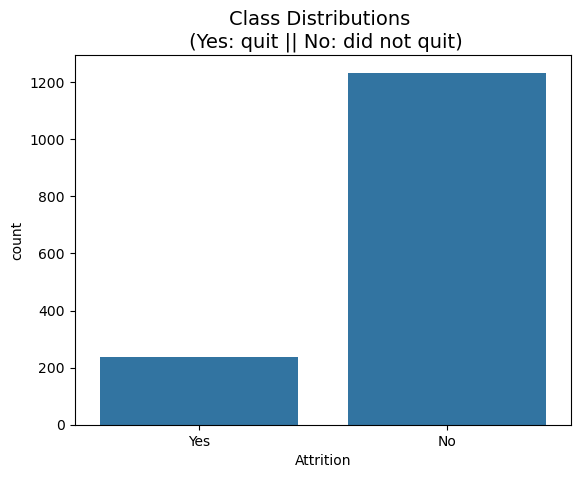

In [6]:
sns.countplot(x ='Attrition', data=df)
plt.title('Class Distributions \n (Yes: quit || No: did not quit)', fontsize=14)
              

In [7]:
rate = df['DailyRate'].values
age_ = df['Age'].values

<Axes: >

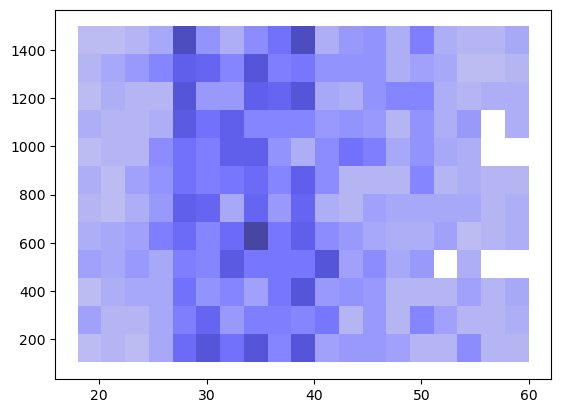

In [8]:
#зависимость возраста от з/п в день
sns.histplot(x = age_, y = rate,  color='b')

In [9]:
#переведем категориальные признаки в числовые
df['Attrition'].replace(['No', 'Yes'],
                        [0, 1], inplace=True)

In [10]:
df['BusinessTravel'].replace(['Non-Travel', 'Travel_Rarely', 'Travel_Frequently'],
                             [1, 2, 3], inplace=True)

In [11]:
#попробую разбить сферы занятости на численные значения
df_dum = df.copy()
df_dum = pd.get_dummies(df_dum, columns = ['EducationField', 'Department', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime'  ], dtype = int)

In [12]:
df_dum['EmployeeCount'].value_counts()

EmployeeCount
1    1470
Name: count, dtype: int64

In [13]:
df_dum = df_dum.drop('EmployeeCount', axis=1)

In [14]:
df_dum = df_dum.drop('Over18', axis=1)

In [15]:
df_dum = df_dum.drop('StandardHours', axis=1)

In [16]:
df_dum.head(3)

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1,2,1102,1,2,1,2,94,3,...,0,0,0,1,0,0,0,1,0,1
1,49,0,3,279,8,1,2,3,61,2,...,0,0,1,0,0,0,1,0,1,0
2,37,1,2,1373,2,2,4,4,92,2,...,0,0,0,0,0,0,0,1,0,1


In [17]:
df['BusinessTravel'].value_counts()

BusinessTravel
2    1043
3     277
1     150
Name: count, dtype: int64

In [18]:
df['EducationField'].value_counts()

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

In [19]:
#сплитим данные, хотим сделать равным количество значений обоих классов.
print('still working', round(df_dum['Attrition'].value_counts()[0]/len(df_dum) * 100,2), '% of the dataset')
print('quited', round(df_dum['Attrition'].value_counts()[1]/len(df_dum) * 100,2), '% of the dataset')

still working 83.88 % of the dataset
quited 16.12 % of the dataset


In [20]:
X = df_dum.drop('Attrition', axis =1)
y = df_dum['Attrition']

In [21]:
sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

In [22]:
for train_index, test_index in sss.split(X, y):
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

In [23]:
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

In [24]:
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)


In [25]:
print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

Label Distributions: 

[0.83843537 0.16156463]
[0.84013605 0.15986395]


In [26]:
df_dum = df_dum.sample(frac=1)

In [27]:
Attrit_df_dum = df_dum.loc[df_dum['Attrition'] == 1]
notAttrit_df_dum = df_dum.loc[df_dum['Attrition'] == 0][:237]

In [28]:
normal_distributed_df = pd.concat([Attrit_df_dum, notAttrit_df_dum])

In [29]:
new_df = normal_distributed_df.sample(frac=1, random_state=42)

In [30]:
new_df['Attrition'].value_counts()

Attrition
0    237
1    237
Name: count, dtype: int64

In [31]:
new_df.head(3)

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
147,41,0,3,857,10,3,199,4,91,2,...,0,0,0,0,0,1,0,0,1,0
63,59,0,2,1435,25,3,81,1,99,3,...,0,0,0,1,0,0,0,1,1,0
752,36,1,2,885,16,4,1042,3,43,4,...,0,0,0,0,0,0,0,1,1,0


Text(0.5, 1.0, 'SubSample Correlation Matrix \n (use for reference)')

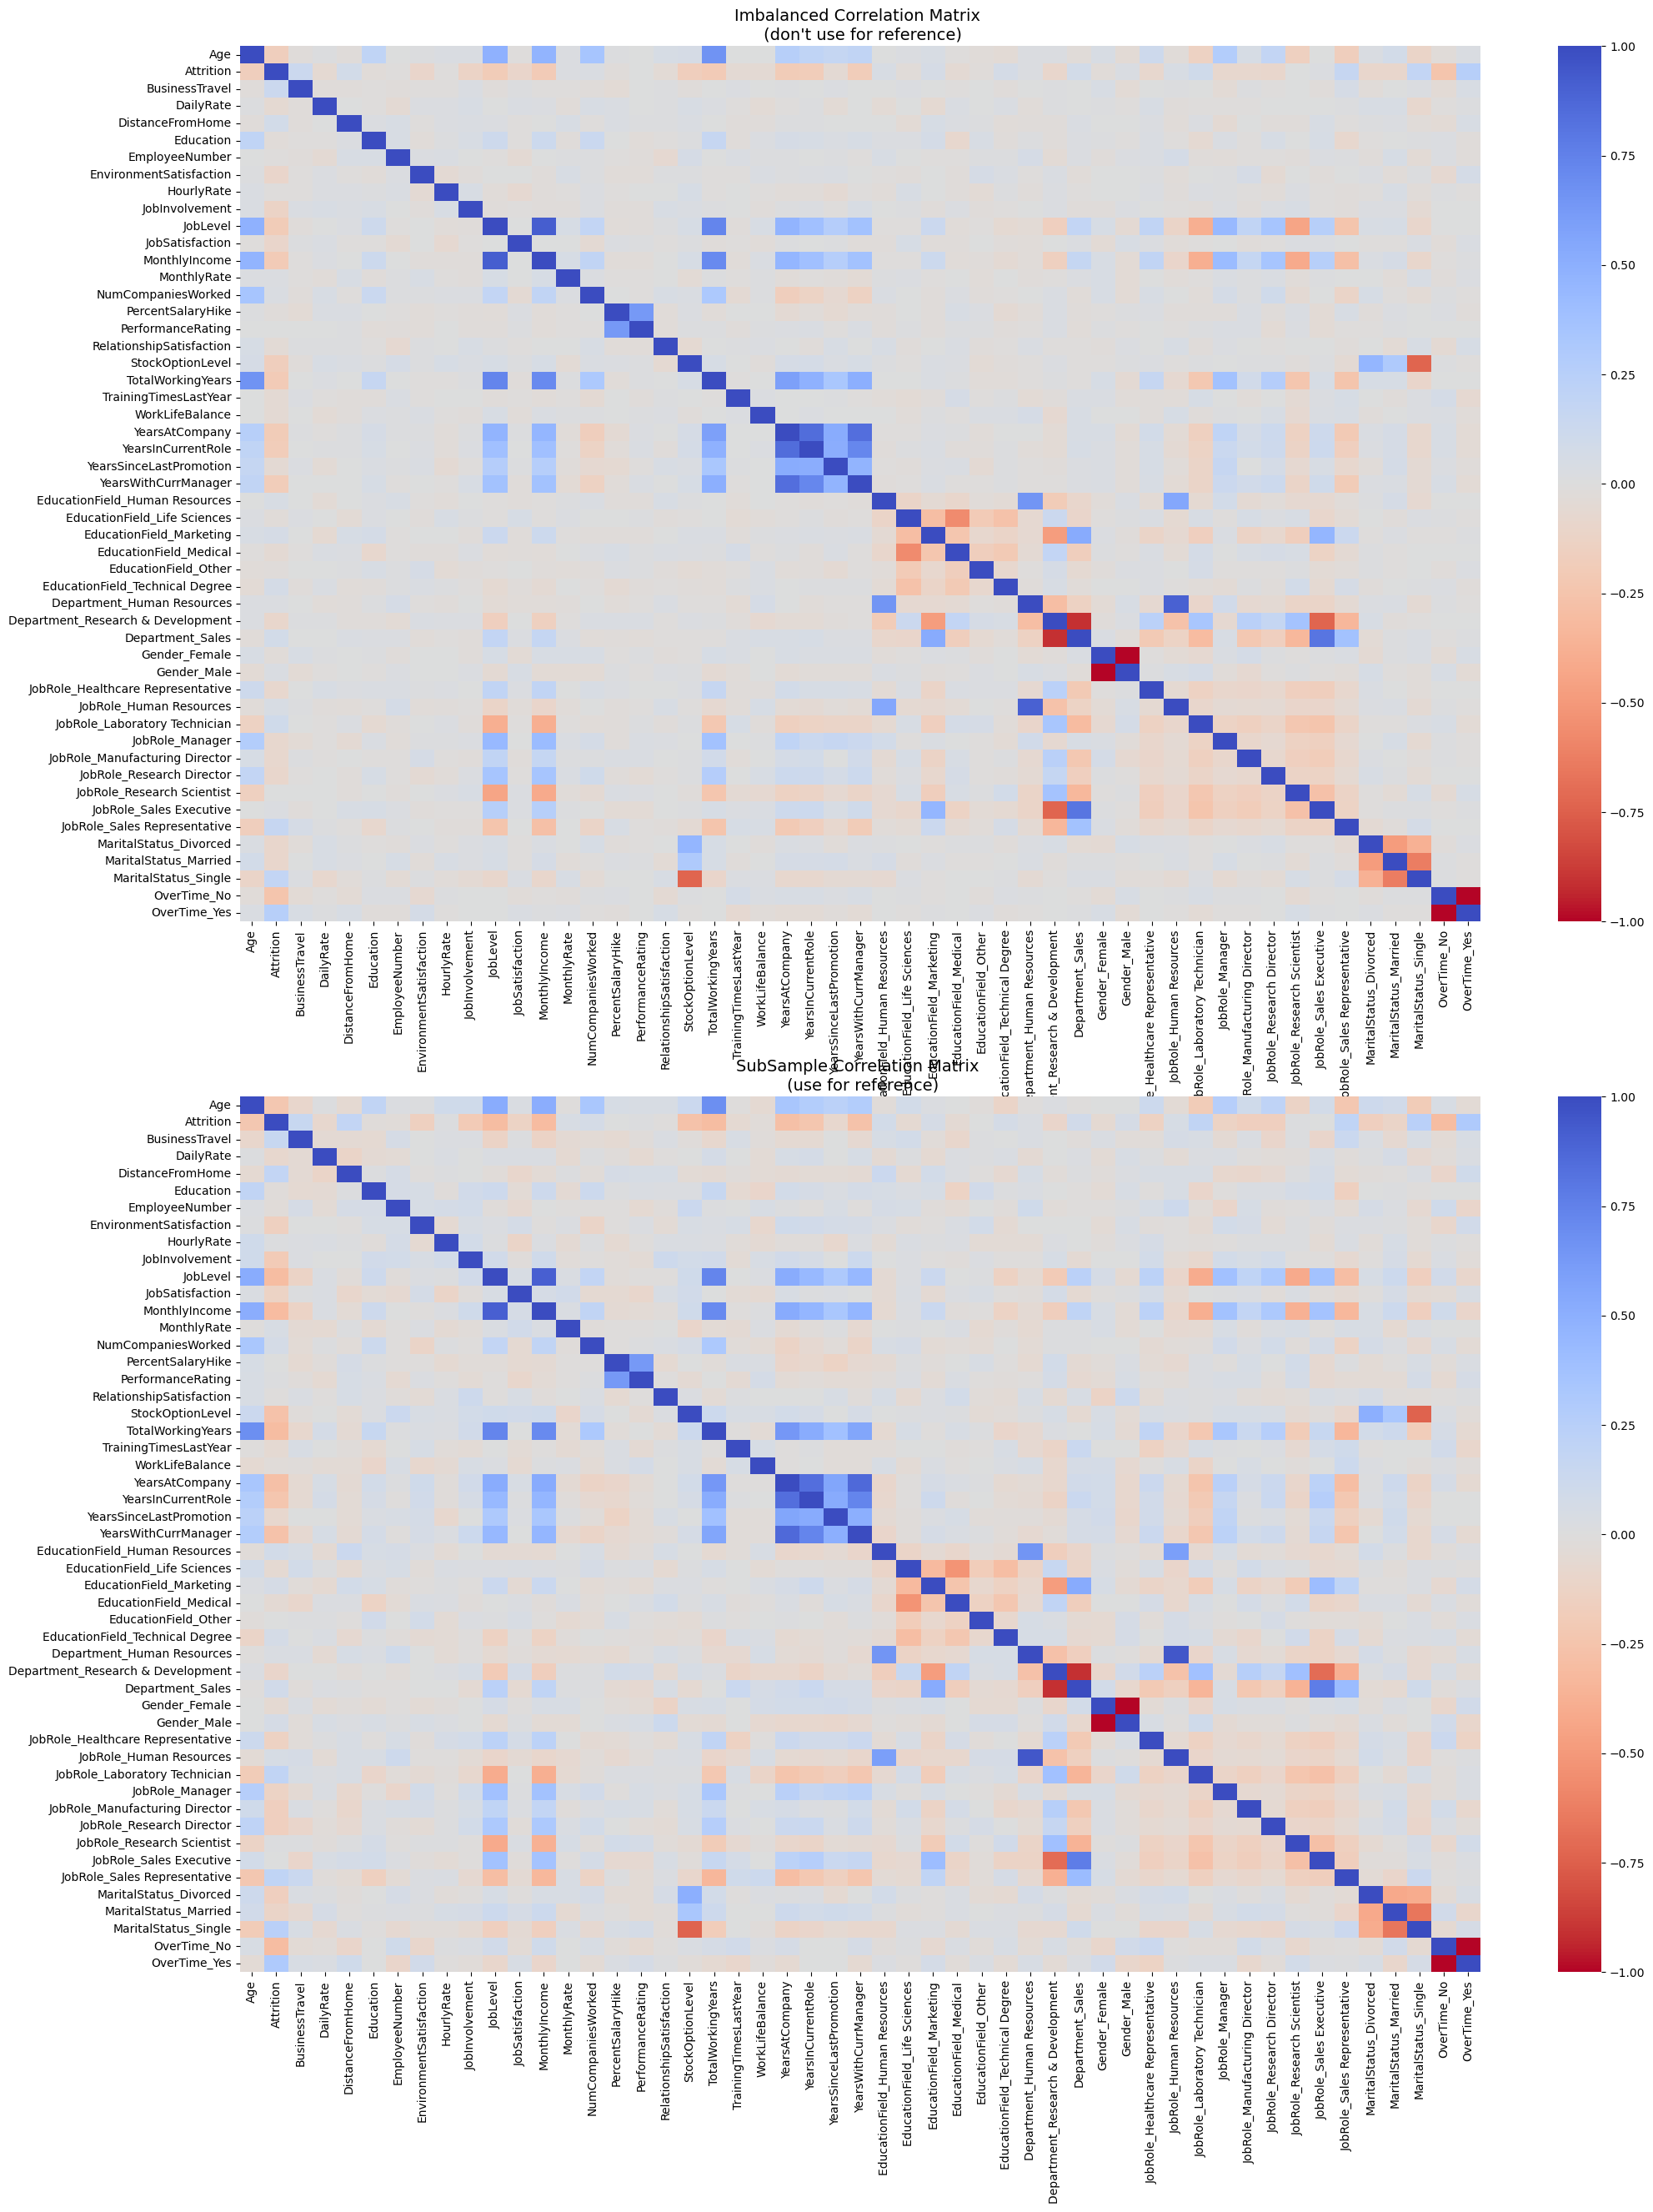

In [32]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,30))
my_matrix = df_dum.corr(method='spearman').round(2)
#построим корреляционные матрицы и графики(для старого и нового датафреймов) для выявления зависимостей 
sns.heatmap(my_matrix, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)

my_matrix2 = new_df.corr(method='spearman').round(2)

sns.heatmap(my_matrix2, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)

In [33]:
# New_df is from the random undersample data (fewer instances)
X = new_df.drop('Attrition', axis=1)
y = new_df['Attrition']

In [34]:
#Приступим к обучению моделей
from sklearn.model_selection import train_test_split
seed = 0

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [37]:
params = {'n_estimators': range(10, 50, 10), 'max_depth': range(1, 6, 2), 'min_samples_leaf': range(2, 4), 'min_samples_split': range(2, 7, 2)}

In [38]:
rf = RandomForestClassifier()

In [39]:
search = GridSearchCV(rf, params, cv=3, n_jobs=-1)

In [40]:
search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(1, 6, 2),
                         'min_samples_leaf': range(2, 4),
                         'min_samples_split': range(2, 7, 2),
                         'n_estimators': range(10, 50, 10)})

In [41]:
best_score = search.best_params_

In [42]:
best_score

{'max_depth': 1,
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'n_estimators': 30}

In [43]:
search_predictions = search.predict(X_test)
#Низкая точность, попробую smote

In [47]:
print("Accuracy score: {}".format(accuracy_score(y_test, search_predictions)))
print("="*80)
print(classification_report(y_test, search_predictions))

Accuracy score: 0.6631578947368421
              precision    recall  f1-score   support

           0       0.61      0.72      0.66        43
           1       0.73      0.62      0.67        52

    accuracy                           0.66        95
   macro avg       0.67      0.67      0.66        95
weighted avg       0.67      0.66      0.66        95



In [49]:
from imblearn.over_sampling import SMOTE

In [51]:
oversampler = SMOTE(random_state=None,sampling_strategy='auto', n_jobs=1 )

In [53]:
X_dum = df_dum.drop('Attrition', axis =1)
y_dum = df_dum['Attrition']

In [55]:
X_dum_train, X_dum_test, y_dum_train, y_dum_test = train_test_split(X_dum, y_dum, test_size=0.2, random_state=42)

In [57]:
X_smote_train, y_smote_train = oversampler.fit_resample(X_dum_train, y_dum_train)

In [59]:
print(len(X_smote_train))

1968


In [112]:
search.fit(X_smote_train, y_smote_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(1, 6, 2),
                         'min_samples_leaf': range(2, 4),
                         'min_samples_split': range(2, 7, 2),
                         'n_estimators': range(10, 50, 10)})

In [113]:
search_pred = search.predict(X_dum_test)

In [114]:
print("Accuracy score: {}".format(accuracy_score(y_dum_test, search_pred)))
print("="*80)
print(classification_report(y_dum_test, search_pred))

Accuracy score: 0.8571428571428571
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       249
           1       0.54      0.47      0.50        45

    accuracy                           0.86       294
   macro avg       0.72      0.70      0.71       294
weighted avg       0.85      0.86      0.85       294



In [64]:
#SMOTE показал себя намного лучше андерсэмплинга
#остается посмотреть какие фичи влияют больше всего на увольнение сотрудников

In [65]:
column_names = X_smote_train.columns.tolist()

In [66]:
importances = search.best_estimator_.feature_importances_

<Axes: >

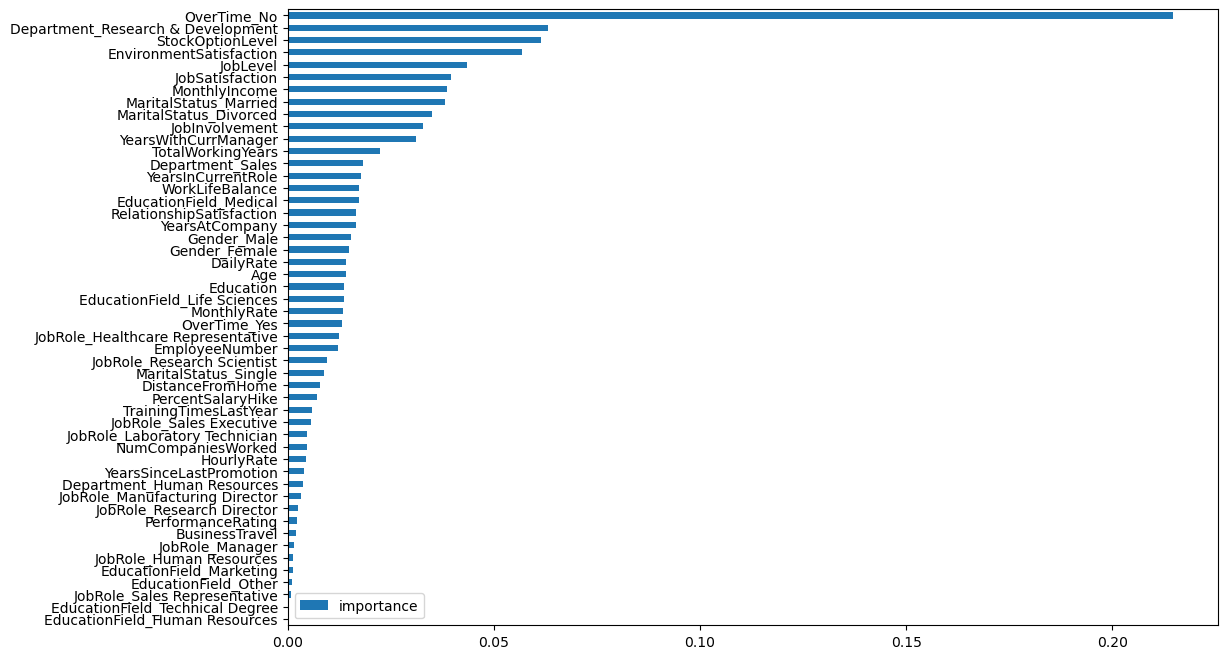

In [67]:
imp = pd.DataFrame(importances, index=X.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))
#видим довольно неожиданную картину. Отсутствие возможности овертаймить сильнее всего влияет на увольнение сотрудников